# Representación gráfica de la solución

## 1. ¿Cómo se mueve un péndulo?


> Se dice que un sistema cualquiera, mecánico, eléctrico, neumático, etc., es un oscilador armónico si, cuando se deja en libertad fuera de su posición de equilibrio, vuelve hacia ella describiendo oscilaciones sinusoidales, o sinusoidales amortiguadas en torno a dicha posición estable.
- https://es.wikipedia.org/wiki/Oscilador_armónico

**Referencias**:
   - http://matplotlib.org
   - https://seaborn.pydata.org
   - http://www.numpy.org
   - http://ipywidgets.readthedocs.io/en/latest/index.html
   
**En realidad esto es el estudio de oscilaciones.**
___
 <div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Wide_Field_Imager_view_of_a_Milky_Way_look-alike_NGC_6744.jpg/712px-Wide_Field_Imager_view_of_a_Milky_Way_look-alike_NGC_6744.jpg" width="400px" height="100px" />
 </div>

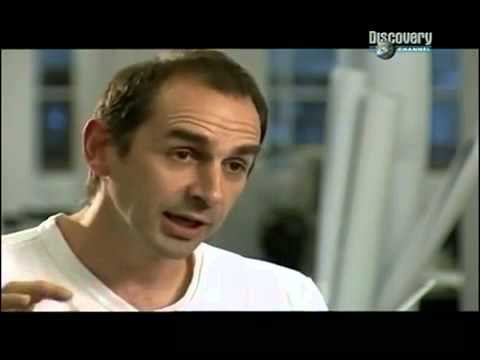

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('k5yTVHr6V14')

Los sistemas mas sencillos a estudiar en oscilaciones son el sistema masa-resorte y el péndulo simple.

<div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/76/Pendulum.jpg" width="210px" height="230px" />

<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/ko/9/9f/Mass_spring.png" width="260px" height="120px" />
</div>

\begin{align}
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x &= 0, \quad\mbox{donde} \quad \omega_{0} = \sqrt{\frac{k}{m}}\notag\\
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta &= 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l}
\end{align}

## Solución en el tiempo
El modelo del sistema `masa-resorte` está descrito por la siguiente **ecuación diferencial**:

\begin{equation}
\frac{d^2x}{dt^2} + \frac{k}{m}x = 0,
\end{equation}

cuya solución se escribe como
\begin{equation}
x(t) = A \cos(\omega_{o} t) + B \sin(\omega_{o} t)
\end{equation}
Y su primera derivada (velocidad) sería
\begin{equation}
v(t) = \frac{dx(t)}{dt} = \omega_{0}[- A \sin(\omega_{0} t) + B\cos(\omega_{0}t)]
\end{equation}

**¿Cómo se ven las gráficas de $x$ vs $t$ y $\frac{dx}{dt}$ vs $t$?**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def pos(t,w0):
  A=5.5
  B=3.2
  return A*np.cos(w0*t)+B*np.sin(w0*t)
def vel(t,w0):
  A=5.5
  B=3.2
  return w0*(-A*np.sin(w0*t)+B*np.cos(w0*t))

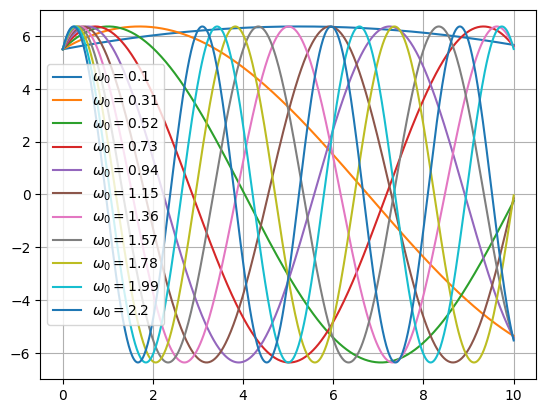

In [4]:
t=np.linspace(0,10,500)
W=np.linspace(0.1,2.2,11)
for w0 in W:
  plt.plot(t,pos(t,w0),label='$\omega_0={}$'.format(round(w0,2)))
plt.legend() # Ubicamos el recuadro de las etiquetas en la mejor posición
plt.grid()

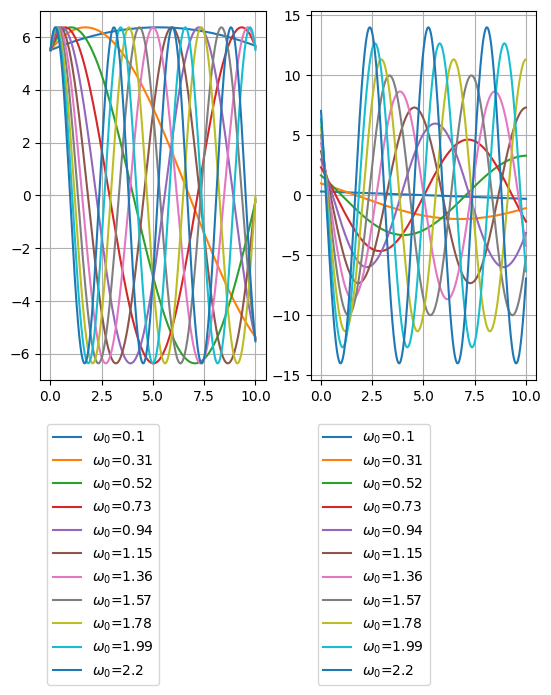

In [5]:
# Subplots (varioas gráficas en una misma figura)
fig=plt.figure()
ax=fig.add_subplot(121) # 1 renglón, 2 columna, y graficamos en la imagen 1
for w0 in W:
  ax.plot(t,pos(t,w0),label='$\omega_0$={}'.format(round(w0,2)))
plt.legend(bbox_to_anchor=(0,-0.1),loc='upper left')
plt.grid()
ax=fig.add_subplot(122)
for w0 in W:
  ax.plot(t,vel(t,w0),label='$\omega_0$={}'.format(round(w0,2)))
plt.legend(bbox_to_anchor=(0,-0.1),loc='upper left')
plt.grid()

In [ ]:
#plt.legend?
'''
==================   =============
Location String      Location Code
==================   =============
'best' (Axes only)   0
'upper right'        1
'upper left'         2
'lower left'         3
'lower right'        4
'right'              5
'center left'        6
'center right'       7
'lower center'       8
'upper center'       9
'center'             10
==================   =============
'''

**Plano de fase**
La posición y velocidad para el sistema `masa-resorte` se escriben como:
\begin{align}
x(t) &= x(0) \cos(\omega_{0} t) + \frac{\dot{x}(0)}{\omega_{0}} \sin(\omega_{0} t)\\
\dot{x}(t) &= -\omega_{0}x(0) \sin(\omega_{0} t) + \dot{x}(0)\cos(\omega_{0}t)
\end{align}

In [6]:
def pos(t,w0,x0,v0):
  return x0*np.cos(w0*t)+v0/w0*np.sin(w0*t)
def vel(t,w0,x0,v0):
  return -w0*x0*np.sin(w0*t)+v0*np.cos(w0*t)

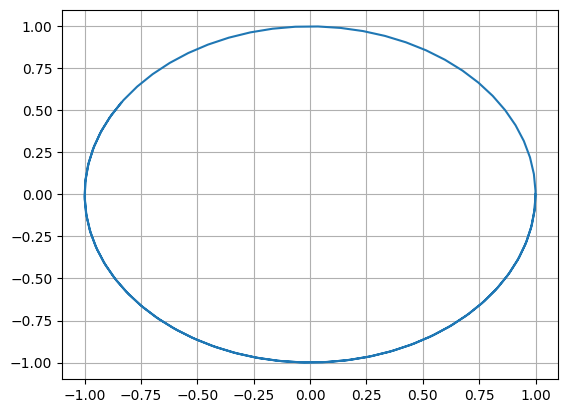

In [7]:
t=np.linspace(0,10,100)
w0=1 # Frecuencia fundamental
x0=1 # Condición inicial para la posición
v0=0 # Condición inicial para la velocidad
x=pos(t,w0,x0,v0)
v=vel(t,w0,x0,v0)

# Plano de fase
plt.plot(x,v)
plt.grid()

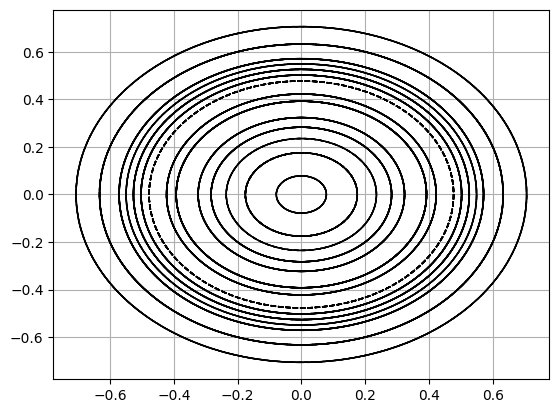

In [16]:
# Graficamos diferentes planos de fase modificando las condiciones iniciales
X0=np.linspace(-0.5,0.5,10)
V0=np.linspace(-0.5,0.5,10)

for x0 in X0:
  for v0 in V0:
    x=pos(t,w0,x0,v0)
    v=vel(t,w0,x0,v0)
    plt.plot(x,v,'--k',lw=1)
plt.grid()

Y si consideramos un conjunto de frecuencias de oscilación, entonces

In [ ]:
#...

Trayectorias del oscilador armónico simple en el espacio fase $(x,\, \dot{x})$.

## Gráfico interactivo

Importemos la clase `interact` e `interact_manual`

In [17]:
from ipywidgets import *

In [19]:
#interact?

In [21]:
def plano_fase(t,w0=1,nx=10,nv=10):
  X0=np.linspace(-0.5,0.5,nx)
  V0=np.linspace(-0.5,0.5,nv)
  for x0 in X0:
    for v0 in V0:
      x=pos(t,w0,x0,v0)
      v=vel(t,w0,x0,v0)
      plt.plot(x,v,'--k',lw=1)
  plt.grid()
  plt.show()

interact(plano_fase,                             # Gráfica
         t=fixed(t),X0=fixed(X0),V0=fixed(V0),   # Argumentos constantes de la gráfica
         w0=(0.1,1,0.1),nx=(1,15,1),nv=(1,15,1)) # Argumento variable de la gráfica

interactive(children=(FloatSlider(value=1.0, description='w0', max=1.0, min=0.1), IntSlider(value=10, descript…

<function __main__.plano_fase(t, w0=1, nx=10, nv=10)>

**Actividad:** Crear un gráfico interactivo para variar la posición inicial $\dot x_0$ y la frecuencia fundamental $\omega_0$, para la velocidad del sistema `masa-resorte`.

In [23]:
@interact_manual(t=fixed(t),X0=fixed(X0),V0=fixed(V0),   # Argumentos constantes de la gráfica
         w0=(0.1,1,0.1),nx=(1,15,1),nv=(1,15,1))         # Argumento variable de la gráfica
def plano_fase(t,w0=1,nx=10,nv=10):
  X0=np.linspace(-0.5,0.5,nx)
  V0=np.linspace(-0.5,0.5,nv)
  for x0 in X0:
    for v0 in V0:
      x=pos(t,w0,x0,v0)
      v=vel(t,w0,x0,v0)
      plt.plot(x,v,'--k',lw=1)
  plt.grid()
  plt.show()

interactive(children=(FloatSlider(value=1.0, description='w0', max=1.0, min=0.1), IntSlider(value=10, descript…

## Animación
importemos ahora la función `FuncAnimation` del paquete `matplotlib.animation`

In [25]:
from matplotlib.animation import FuncAnimation

In [29]:
#FuncAnimation?

**Animación del péndulo.**

La solución para el sistema reducido del `péndulo` es

\begin{align}
\theta(t) &= \theta(0) \cos(\omega_{0} t) + \frac{\dot{\theta}(0)}{\omega_{0}} \sin(\omega_{0} t)\\
\dot{\theta}(t) &= -\omega_{0}\theta(0) \sin(\omega_{0} t) + \dot{\theta}(0)\cos(\omega_{0}t).
\end{align}

Las posiciones $x$ y $y$ se obtienen de la descomposición entre la longitud y el ángulo:

\begin{align}
x &= l \sin(\theta), \quad
y = -l \cos(\theta) .
\end{align}

In [ ]:
# En Jupyter
#%matplotlib notebook

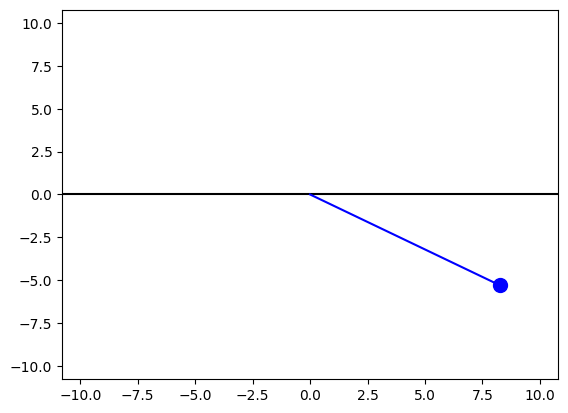

In [35]:
fig=plt.figure()
def pendulo(t,w0,th0,v0):
  L=9.81/(w0**2)
  th=pos(t,w0,th0,v0)
  x=L*np.sin(th)
  y=-L*np.cos(th)

  plt.clf() # Limpiamos el gráfico
  lineas=plt.plot([-1.1*L,1.1*L],[0,0],'k', # Linea de soporte para el péndulo
           [0,x],[0,y],'b',                 # Cable del péndulo
           x,y,'ob',ms=10)                  # Final del péndulo
  plt.axis([-1.1*L,1.1*L,-1.1*L,1.1*L])
  return lineas
w0=1
th0=1
v0=0
t=np.linspace(0,10,100)
anim=FuncAnimation(fig,pendulo,t,fargs=(w0,th0,v0),interval=100)

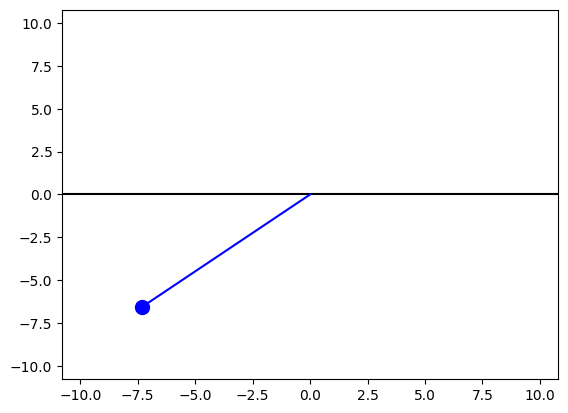

In [36]:
anim.save('pendulo.mp4',fps=10)

Animación del sitema masa-resorte